


# DEPARTAMENTO MARKETING - Análise de dados!

# Introdução

Esse projeto tem objetivo de explorar hipóteses junto com o departamento de marketing para aumentar a conversão dos usuários.



## Dicionário de dados

Há três DataFrames que iremos trabalhar:

- `hypotheses_us` (dados sobre hipóteses):
    - `'hypotheses'`: alcance do usuário, em uma escala de um a dez
    - `'Reach'`:  alcance do usuário, em uma escala de um a dez
    - `'Impact'`: impacto nos usuários, em uma escala de um a dez
    - `'Confidence'`: confiança na hipótese, em uma escala de um a dez
    - `'Effort'`: os recursos necessários para testar uma hipótese, em uma escala de um a dez. Quanto maior o valor de Effort, mais recursos são necessários para o teste

- `orders_us` (dados sobre os pedidos):
    - `'transactionId'`: identificador do pedido
    - `'visitorId'`: identificador do usuário que fez o pedido
    - `'date'`: data do pedido
    - `'revenue'`: receita do pedido
    - `'group'`: o grupo de teste A/B ao qual o usuário pertence 
    
- `visits_us` (dados sobre as visitas à loja online):
    - `'date'`: data da visita
    - `'group'`: grupo de teste A/B
    - `'visits'`: o número de visitas na data especificada para o grupo de teste A/B especificado

## Importando as Bibliotecas:

In [1]:
import pandas as pd
from scipy import stats as st
import seaborn as sns
import numpy as np
import math
from matplotlib import pyplot as plt

## Etapa 1. Carregando os dados:

In [2]:
df_hypotheses = pd.read_csv('hypotheses_us.csv', sep=';')
df_orders = pd.read_csv('orders_us.csv')
df_visits = pd.read_csv('visits_us.csv')

### DataFrame `Hypotheses`

In [3]:
df_hypotheses.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [4]:
df_hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


### DataFrame `Orders`

In [5]:
df_orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [6]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


### DataFrame `Visits`

In [7]:
df_visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [8]:
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


## Etapa 2. Preparação de dados

-	Verificação e correção os tipos de dados


## Corrigindo os dados:

### DataFrame `Hypotheses`

**Removendo dados duplicados e conferindo dados ausentes no DataFrame:**

In [9]:
df_hypotheses.drop_duplicates(inplace=True)
print('o número de dados duplicados no Dataframe é de:', df_hypotheses.duplicated().sum())
print()
print('o número de dados ausentes no Dataframe é de:', df_hypotheses.isna().sum())

o número de dados duplicados no Dataframe é de: 0

o número de dados ausentes no Dataframe é de: Hypothesis    0
Reach         0
Impact        0
Confidence    0
Effort        0
dtype: int64


**Consertando os títulos da colunas:**

In [10]:
df_hypotheses.columns = df_hypotheses.columns.str.lower()
df_hypotheses.head()

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


### DataFrame `Orders`

**Removendo dados duplicados e conferindo dados ausentes no DataFrame:**

In [11]:
df_orders.drop_duplicates(inplace=True)
print('o número de dados duplicados no Dataframe é de: ', df_orders.duplicated().sum())
print()
print('o número de dados ausentes no Dataframe é de: ', df_orders.isna().sum())

o número de dados duplicados no Dataframe é de:  0

o número de dados ausentes no Dataframe é de:  transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


**Consertando os títulos da colunas:**

In [12]:
df_orders.columns = df_orders.columns.str.lower()
df_orders.head()

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


**Modificando o tipo de dado de data no DataFrame:**

In [13]:
df_orders['date'] = pd.to_datetime(df_orders['date'])

### DataFrame `Visits`

**Removendo dados duplicados e conferindo dados ausentes no DataFrame:**

In [14]:
df_visits.drop_duplicates(inplace=True)
print('o número de dados duplicados no Dataframe é de: ', df_visits.duplicated().sum())
print()
print('o número de dados ausentes no Dataframe é de: ', df_visits.isna().sum())

o número de dados duplicados no Dataframe é de:  0

o número de dados ausentes no Dataframe é de:  date      0
group     0
visits    0
dtype: int64


**Modificando o tipo de dado de data no DataFrame:**

In [15]:
df_visits['date'] = pd.to_datetime(df_visits['date'])

## Etapa 3. Priorizando Hipóteses

In [16]:
df_hypotheses.head()

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


**Aplicando o método ``ICE`` para a priorização das Hipóteses:**

In [17]:
df_hypotheses['ICE'] = (df_hypotheses['impact'] * df_hypotheses['confidence']) / df_hypotheses['effort']
df_hypotheses[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round(2)

,hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.20
0,Add two new channels for attracting traffic. T...,13.33
7,Add a subscription form to all the main pages....,11.20
6,Show banners with current offers and sales on ...,8.00
2,Add product recommendation blocks to the store...,7.00
1,Launch your own delivery service. This will sh...,2.00
5,Add a customer review page. This will increase...,1.33
3,Change the category structure. This will incre...,1.12
4,Change the background color on the main page. ...,1.00


In [18]:
df_hypotheses['RICE'] = (df_hypotheses['reach'] * df_hypotheses['impact'] * df_hypotheses['confidence']) / df_hypotheses['effort']
df_hypotheses[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


<span style="color:green;"> Como podemos notar em ambas análises as ``Hipóteses`` tem um rankeamento diferente. Isso acontece porque, na fórmula do ``RICE`` adicionamos outro fator chamado ``REACH`` que nada mais é que o ``ALCANCE`` do número de pessoas que essa hipótese afetará. Então, quando usar ICE ou RICE? Se quiseremos usar o framework ``ICE`` é para uma abordagem mais rápida e simples e menos detalhada e já o ``RICE`` é para uma análise mais detalhada e tende a ser mais preciso.</span>

## Etapa 3. Análise de teste A/B

In [19]:
df_orders.head()

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [20]:
df_visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


**Agregando dados do dataframe ``Orders``:**

In [21]:
datesGroups = df_orders[['date','group']].drop_duplicates()
ordersAggregated = (
    datesGroups.apply(lambda x: df_orders[np.logical_and(df_orders['date'] <= x['date'], df_orders['group'] == x['group'])].agg(
        {'date' : 'max', 'group' : 'max', 'transactionid' : pd.Series.nunique, 'visitorid' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
)
ordersAggregated.head()

,date,group,transactionid,visitorid,revenue
55,2019-08-01,A,24,20,2356.8
66,2019-08-01,B,21,20,1620.0
175,2019-08-02,A,44,38,3860.3
173,2019-08-02,B,45,43,4243.8
291,2019-08-03,A,68,62,5675.5


**Agregando dados do dataframe ``Visits``:**

In [22]:
visitorsAggregated = (
    datesGroups.apply(lambda x: df_visits[np.logical_and(df_visits['date'] <= x['date'], df_visits['group'] == x['group'])].agg(
        {'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])
)
visitorsAggregated.head()

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


**Fazendo a junção dos Dataframes agregados ``orders`` e ``visits``:**

In [23]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845


**Calculando a ``receita acumulada`` dos ``grupo A e B`` durante o período estudado:**

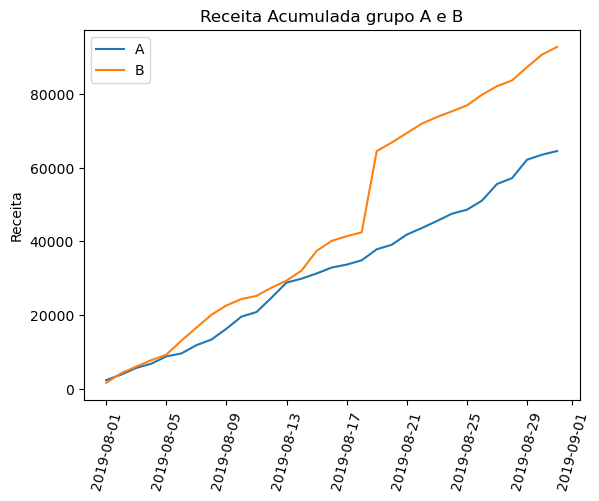

In [24]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation=75)
plt.title('Receita Acumulada grupo A e B')
plt.ylabel("Receita")
plt.legend();

<span style="color:green;"> Podemos observar no gráfico acima que a receita do ``grupo A`` foi crescendo costantemente cada mês, já o ``grupo B`` na data ``2019-08-17`` teve um salto abrupto que pode ser caracterizado por um aumento nos pedidos nessa data ou uma compra muito mais cara que as normais, porém depois manteve se constante novamente e finalizou na frente do ``grupo A``.</span>

**Obtendo o gráfico de  ``volume médio de compra`` dos ``grupo A e B``:**

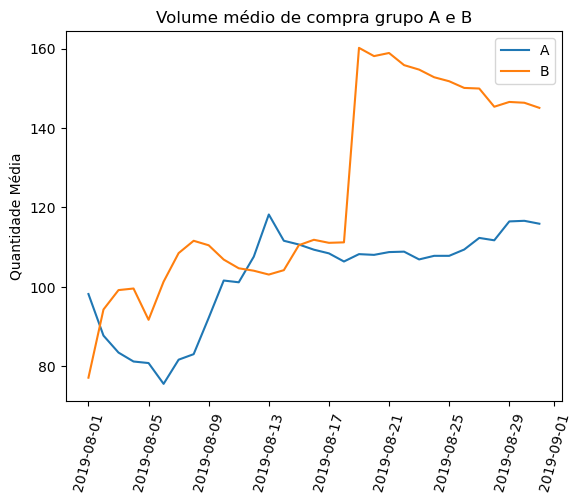

In [25]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=75)
plt.title('Volume médio de compra grupo A e B')
plt.ylabel("Quantidade Média")
plt.legend();

<span style="color:green;"> Podemos observar no gráfico acima um comportamento semelhante ao gráfico já analisado, na mesma data já citada, tivemos um aumento significativo que ainda estamos analisando. Sobre o comportamento dos dois grupos, podemos ver que apesar da `Receita` ter crescido constantemente, com o ``Volume médio de compra`` foi diferente, uma vez que hora o gráfico decrescia, hora ele se mantinha constante para os dois grupos. </span>

**Obtendo o gráfico da ``Diferença relativa do volume de conversão`` dos ``grupo A e B``:**

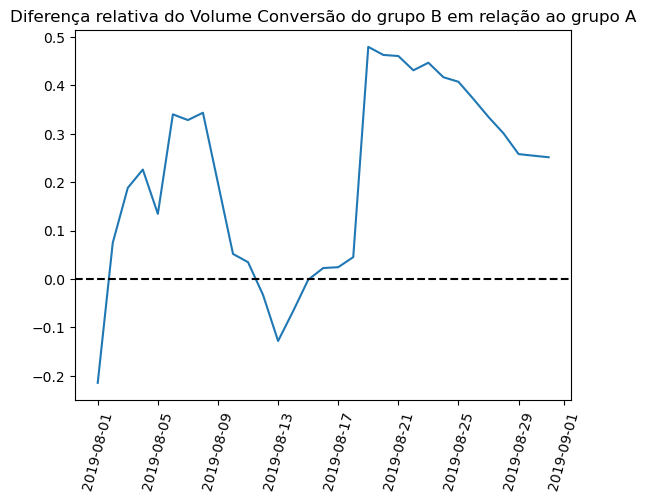

In [26]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xticks(rotation=75)
plt.title('Diferença relativa do Volume Conversão do grupo B em relação ao grupo A')
plt.axhline(y=0, color='black', linestyle='--');

<span style="color:green;"> Podemos observar no gráfico acima que ainda há evidências de valores atípicos na amostra, que ainda podem ser pedidos grandes ou valores muito vultuosos. </span>

**Obtendo o gráfico da ``Conversão cumulativa`` dos ``grupo A e B``:**

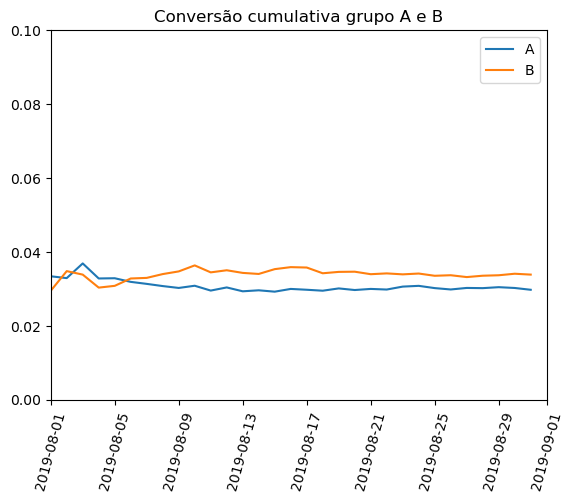

In [27]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(rotation=75)
plt.title('Conversão cumulativa grupo A e B')
plt.legend()
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-09-01'), 0, 0.1]);

<span style="color:green;"> Como podemos observar no gráfico acima, os gráficos são simétricos. </span>

**Obtendo o gráfico da ``Diferença relativa da Conversão cumulativa`` dos ``grupo A e B``:**

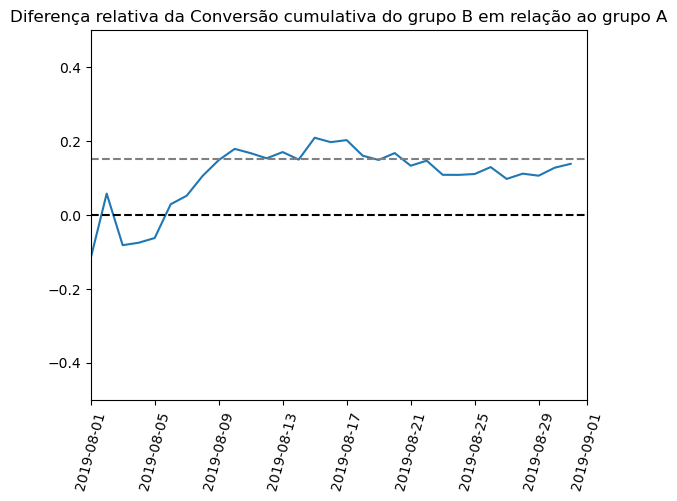

In [49]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.xticks(rotation=75)
plt.title('Diferença relativa da Conversão cumulativa do grupo B em relação ao grupo A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-09-01'), -0.5, 0.5]);

<span style="color:green;"> Como podemos observar neste gráfico acima, o `grupo B` se manteve na liderança em relação diferença relativa da conversão cumulativa, no começo ficou um pouco abaixo, mas depois se manteve estável e chegou a acumular mais de 20% em relação ao `grupo A` e logo depois se mantendo um pouco acima de 15%. </span>

**Obtendo os gráficos ``Histograma`` e ``Dispersão`` da distribuição de receita:**

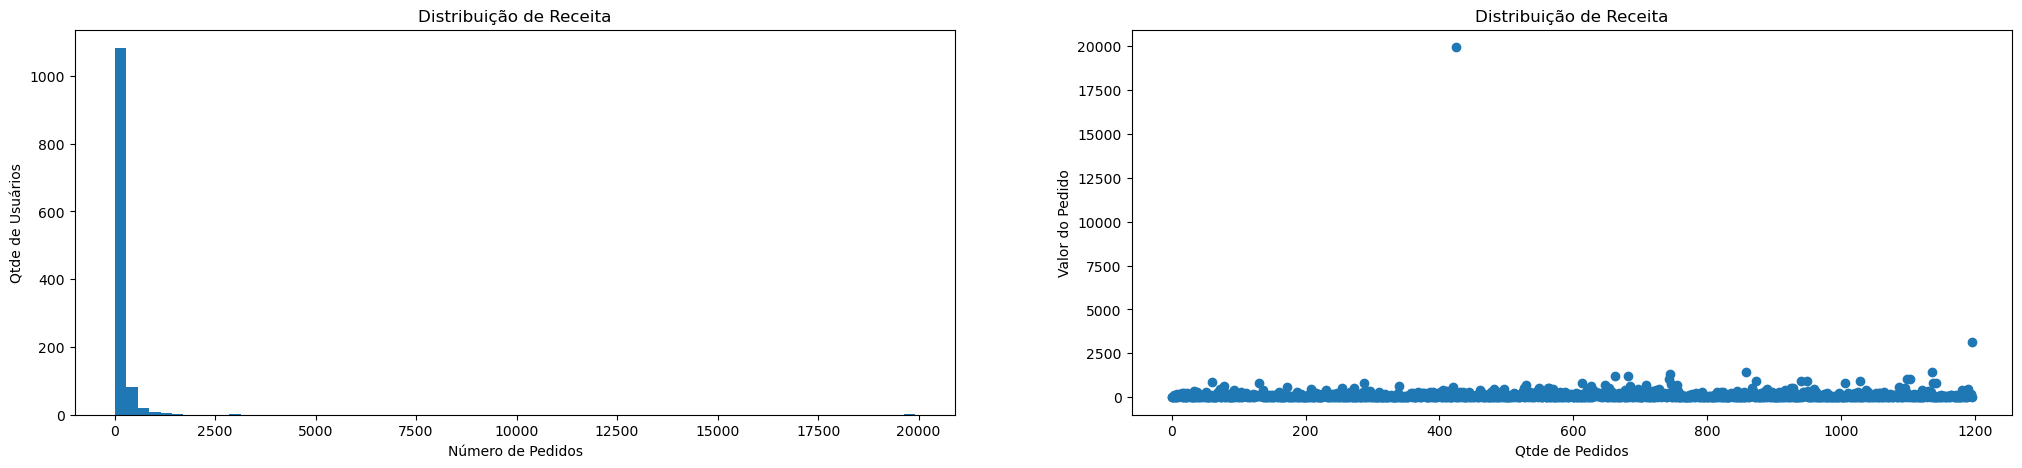

In [30]:
fig, ax = plt.subplots(1, 2, figsize = (25,5))
ax[0].hist(df_orders['revenue'], bins=70)
ax[0].set_title('Distribuição de Receita')
ax[0].set_xlabel('Número de Pedidos')
ax[0].set_ylabel('Qtde de Usuários')
x_values = pd.Series(range(0, len(df_orders['revenue'])))
ax[1].scatter(x_values, df_orders['revenue'])
ax[1].set_title('Distribuição de Receita')
ax[1].set_xlabel('Qtde de Pedidos')
ax[1].set_ylabel('Valor do Pedido');

<span style="color:green;"> Como podemos notar nos gráficos de ``Histograma`` e ``Dispersão`` acima, a maioria dos usuários fazem pedidos com pequenos valores e há claro na amostra pedidos com valores atípicos, porém o predomínio são de valores menores nos pedidos.</span>

**Calculando o ``Percentil`` das receitas:**

In [31]:
np.percentile(df_orders['revenue'], [90, 95, 99])

array([282.48 , 435.54 , 900.904])

<span style="color:green;"> Agora analisando pelos ``percentis`` (amostra divida em 100 partes) onde ``25% da amostra`` está abaixo de Q1 (1º quartil) e ``75% acima``. Para análise pegamos os percentis ``90, 95 e 99`` e percebemos que ``menos de 1%`` dos pedidos custou mais que 900 dólares.  </span>

**Calculando o número de ``pedidos por usuário``:**

In [32]:
ordersByUsers = (
    df_orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)

ordersByUsers.columns = ['user_id', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head())

         user_id  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5


<span style="color:green;"> Agora na tabela acima conseguimos notar que alguns usuários fizeram muitos pedidos durante um pequeno período, porém são valores atípicos na amostra, uma vez que ``11 pedidos`` em um curto período de tempo não é considerado normal para todos os usuários.</span>

**Obtendo os gráficos ``Histograma`` e ``Dispersão`` dos pedidos dos usuários:**

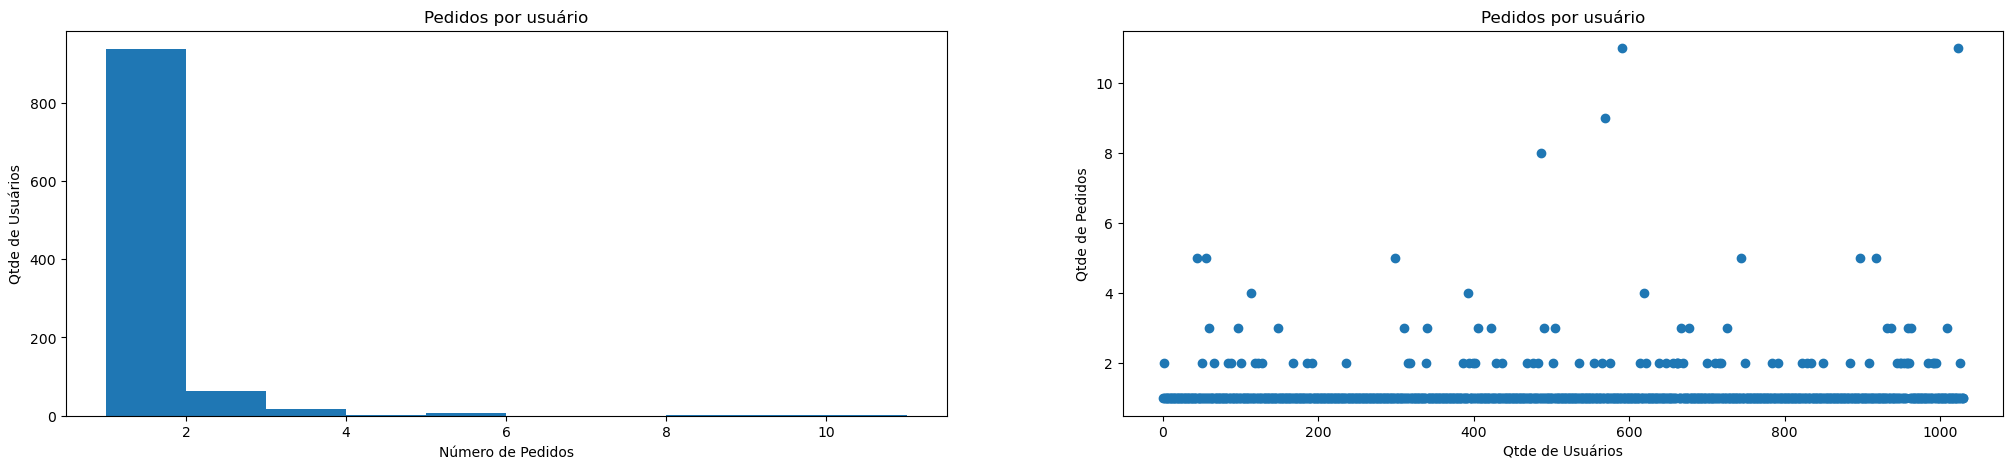

In [33]:
fig, ax = plt.subplots(1, 2, figsize = (25,5))
ax[0].hist(ordersByUsers['orders'])
ax[0].set_title('Pedidos por usuário')
ax[0].set_xlabel('Número de Pedidos')
ax[0].set_ylabel('Qtde de Usuários')
x_values = pd.Series(range(0, len(ordersByUsers['orders'])))
ax[1].scatter(x_values, ordersByUsers['orders'])
ax[1].set_title('Pedidos por usuário')
ax[1].set_xlabel('Qtde de Usuários')
ax[1].set_ylabel('Qtde de Pedidos');

<span style="color:green;"> Nos gráficos acima podemos notar que a maioria dos usuários fazem 1 pedido e alguns fazem de 2 a 6 pedidos e usuários atípicos de 8 a 11 como já observado. </span>

**Calculando o ``Percentil`` dos pedidos dos usuários:**

In [34]:
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 2., 4.])

<span style="color:green;">Olhando para os percentis acima, ``menos de 1%`` da amostra fazem ``mais que 4 pedidos``, enquanto ``90% da amostra`` fazem entre ``1 e 2 pedidos``.</span>

**Calculando a ``significância estatística`` e a ``média`` da conversão entre os ``grupos A e B``:**

In [41]:
ordersByUsersA = df_orders[df_orders['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = df_orders[df_orders['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersB.columns = ['user_id', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(df_visits[df_visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(df_visits[df_visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print('A significância estatística da diferença na conversão entre os grupos é: ', "{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print('A média da diferença da conversão entre os grupos é: ', "{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

A significância estatística da diferença na conversão entre os grupos é:  0.017
A média da diferença da conversão entre os grupos é:  0.138


<span style="color:green;">Olhando para os dados de significância acima e considerando um ``nível de significância de 5%``, o resultado do teste mostra que há uma ``diferença significativa`` das duas amostras em relação a diferença de conversão entre os outros grupos. Outra fator observado é que ``a conversão média`` do grupo B é ``13,8% maior`` do que a do grupo A.</span>

**Calculando a ``significância estatística`` e a ``média`` do tamanho médio do pedido entre os ``grupos A e B``:**

In [42]:
print('A significância estatística da diferença do tamanho médio do pedido entre os grupos é: ','{0:.3f}'.format(st.mannwhitneyu(df_orders[df_orders['group']=='A']['revenue'], df_orders[df_orders['group']=='B']['revenue'])[1]))
print('A média da diferença de receita entre os grupos é: ','{0:.3f}'.format(df_orders[df_orders['group']=='B']['revenue'].mean()/df_orders[df_orders['group']=='A']['revenue'].mean()-1))

A significância estatística da diferença do tamanho médio do pedido entre os grupos é:  0.692
A média da diferença de receita entre os grupos é:  0.252


<span style="color:green;">Olhando para os dados de significância acima e considerando um ``nível de significância de 5%``, apesar de observarmos uma diferença no ``volume médio de compras`` do ``grupo B`` para o ``grupo A``, não rejeitaremos a Hipótese Nula. Outra fator que podemos notar é que há uma diferença na ``receita média``entre os ``grupo B`` e ``grupo A``. Iremos analisar mais afrente se os ``dados de compras atípicos`` estão atrapalhando os testes.</span>

**Cálculo para análise dos usuários ``anômalos`` na amostra:**

In [44]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 4]['user_id'], ordersByUsersB[ordersByUsersB['orders'] > 4]['user_id']], axis = 0)
usersWithExpensiveOrders = df_orders[df_orders['revenue'] > 900]['visitorid']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print("O número de usuários anômalos na amostra é de: ", abnormalUsers.shape)

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
dtype: int64
O número de usuários anômalos na amostra é de:  (15,)


<span style="color:green;">Agora na análise acima, podemos notar que há ``15 usuários`` que podemos chamar de ``anômalos`` que são aqueles fora do padrão da análise, atípicos ou que realizam pedidos bem maiores do que os usuários comuns. Isso foi feito baseado em análise acima mostrando que ``menos de 1%`` da amostra fazem ``mais que 4 pedidos``. Então, filtramos estes mesmos usuários para análise.</span>

**Calculando a ``significância estatística`` e a ``média`` da conversão, filtrando usuários ``anômalos``, entre os ``grupos A e B``:**

In [51]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))]['orders'],pd.Series(
    0, index=np.arange(df_visits[df_visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))]['orders'],pd.Series(
    0, index=np.arange(df_visits[df_visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

print('A significância estatística, filtrando os usuários anômalos, da diferença na conversão entre os grupos é: ', "{0:.3f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('A média, filtrando os usuários anômalos, da diferença da conversão entre os grupos é: ', "{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

A significância estatística, filtrando os usuários anômalos, da diferença na conversão entre os grupos é:  0.014
A média, filtrando os usuários anômalos, da diferença da conversão entre os grupos é:  0.153


<span style="color:green;">Com os mesmos usuários ``anômalos`` filtrados, pudemos notar que o ``resultado`` do teste ``não mudou`` em relação a ``diferença e a média de conversão`` entre os grupos.</span>

**Calculando a ``significância estatística`` e a ``média`` do tamanho médio do pedido, filtrando usuários ``anômalos``, entre os ``grupos A e B``:**

In [50]:
print('A significância estatística, filtrando os usuários anômalos, da diferença do tamanho médio do pedido entre os grupos é: ','{0:.3f}'.format(st.mannwhitneyu(
    df_orders[np.logical_and(
        df_orders['group']=='A',
        np.logical_not(df_orders['visitorid'].isin(abnormalUsers)))]['revenue'],
    df_orders[np.logical_and(
        df_orders['group']=='B',
        np.logical_not(df_orders['visitorid'].isin(abnormalUsers)))]['revenue'])[1]))

print('A média, filtrando os usuários anômalos, da diferença de receita entre os grupos é: ','{0:.3f}'.format(
    df_orders[np.logical_and(
        df_orders['group']=='B',
        np.logical_not(df_orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()/
    df_orders[np.logical_and(df_orders['group']=='A',np.logical_not(df_orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean() - 1))

A significância estatística, filtrando os usuários anômalos, da diferença do tamanho médio do pedido entre os grupos é:  0.819
A média, filtrando os usuários anômalos, da diferença de receita entre os grupos é:  -0.006


<span style="color:green;">Podemos notar acima que ``removendo os usuários atípicos``, a diferença entre o tamanho médio do pedido ``pouco alterou`` e a ``diferença de receita`` entre os dois grupos agora ``é de 6%``.</span>

# Conclusão geral

- Para concluir, gostaria de fazer alguns apontamentos:
    - A Receita acumulada do grupo B foi crescendo constantemente e houve um aumento abrupto (valores atípicos) em certo ponto e depois permaneceu constante
    - Para compravar o valor atípico da receita, o gráfico de volume médio de compra também mostrou um aumento abrupto na mesma data, mostrando que foram feito muitos pedidos especificamente neste dia
    - Pudemos observar também que a conversão cumulativa entre os grupos A e B se mostrou simétrica
    - Outro fato importante é que a diferença relativa da conversão cumulativa do grupo B chegou a um pico de 20% maior do que a do grupo A e depois caiu um pouco e se manteve estável com uma tendência de crescimento
    - Na amostra notou-se que haviam 15 usuários atípicos que fizeram mais de 4 pedidos durante o período estudado e que correspondiam a 1% somente da amostra, já que a maioria dos usuários fizeram de 1 a 2 pedidos
    - Sobre a significância da amostra, as análises estatísticas demonstraram que havia um diferença signifcativa de receita, pedidos e volume médio de pedidos do grupo B em relação ao grupo A.

``Análise final`` - Tendo esses dados acima para base de análise, conseguimos notar que o teste foi um sucesso, uma vez a nova "feature" usada somente para o grupo B fez com que os usuários do mesmo grupo fizessem mais pedidos e consequentemente obteve-se uma conversão maior. Sendo assim, podemos parar o teste e ir para a próxima hipótese.